In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Plots of population depending on the grid discretication:

In [30]:
data50 = pd.read_csv("50", sep=" ", header=None)
data100 = pd.read_csv("100", sep=" ", header=None)
data300 = pd.read_csv("300", sep=" ", header=None)
data500 = pd.read_csv("500", sep=" ", header=None)

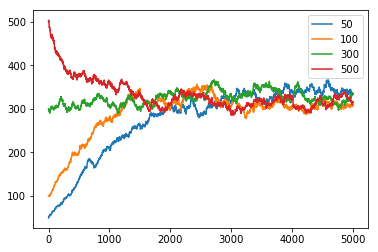

In [31]:
plt.plot(data50[0], data50[1], label="50")
plt.plot(data100[0], data100[1], label="100")
plt.plot(data300[0], data300[1], label="300")
plt.plot(data500[0], data500[1], label="500")
plt.legend()
plt.show()

In [26]:
"""
birth_rate = 3e-3
death_rate = 1e-5
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data500 = pd.read_csv("500.txt", sep="\n", header=None)
data400 = pd.read_csv("400.txt", sep="\n", header=None)
data100 = pd.read_csv("100.txt", sep="\n", header=None)


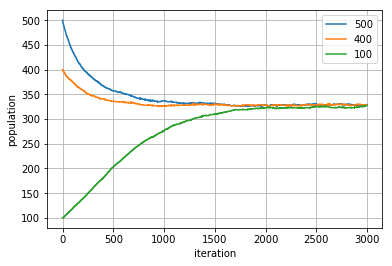

In [27]:
plt.plot(list(range((data500.shape[0]))), data500[0], label="500")
plt.plot(list(range((data400.shape[0]))), data400[0], label="400")
plt.plot(list(range((data100.shape[0]))), data100[0], label="100")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()

In [30]:
"""
birth_rate = 3e-3
death_rate = 1e-4
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data505 = pd.read_csv("505.txt", sep="\n", header=None)
data404 = pd.read_csv("404.txt", sep="\n", header=None)
data10 = pd.read_csv("10.txt", sep="\n", header=None)

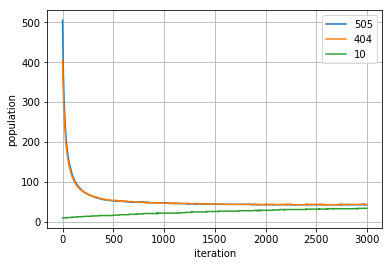

In [31]:
plt.plot(list(range((data505.shape[0]))), data505[0], label="505")
plt.plot(list(range((data404.shape[0]))), data404[0], label="404")
plt.plot(list(range((data10.shape[0]))), data10[0], label="10")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()

In [38]:
"""
birth_rate = 6e-3
death_rate = 1e-5
birth_variance = 2e-2
death_variance = 1e-2
Отрезок [0;1]
"""

data515 = pd.read_csv("515.txt", sep="\n", header=None)
data818 = pd.read_csv("818.txt", sep="\n", header=None)
data690 = pd.read_csv("690.txt", sep="\n", header=None)

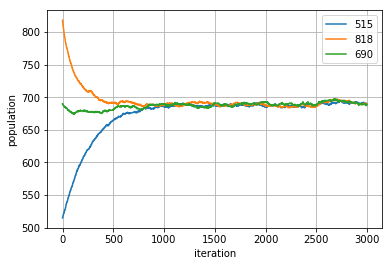

In [39]:
plt.plot(list(range((data515.shape[0]))), data515[0], label="515")
plt.plot(list(range((data818.shape[0]))), data818[0], label="818")
plt.plot(list(range((data690.shape[0]))), data690[0], label="690")
plt.ylabel('population')
plt.xlabel('iteration')
plt.legend()
plt.grid()
plt.show()

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import os

In [2]:
os.chdir("Sim_09.04.18-14.38.50")

In [3]:
first_momentum = np.array([])
birth_var_list = np.array([])
death_var_list = np.array([])
# print(os.listdir())
for filename in os.listdir():
    file = open(filename, "r")
    birth_var, death_var = float(filename.split("_")[0]), float(filename.split("_")[1])
    val = np.array(file.read().split()[-500:], dtype=float).mean()
    if val < 7000:
        first_momentum = np.append(first_momentum, val)
    else:
        first_momentum = np.append(first_momentum, 7000)
    birth_var_list = np.append(birth_var_list, float(birth_var))
    death_var_list = np.append(death_var_list, float(death_var))
        
    file.close()
    

In [4]:
#print(first_momentum, birth_var_list, death_var_list)
#print(first_momentum)
print(type(first_momentum[0]))
print(type(birth_var_list[0]))
print(type(death_var_list[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


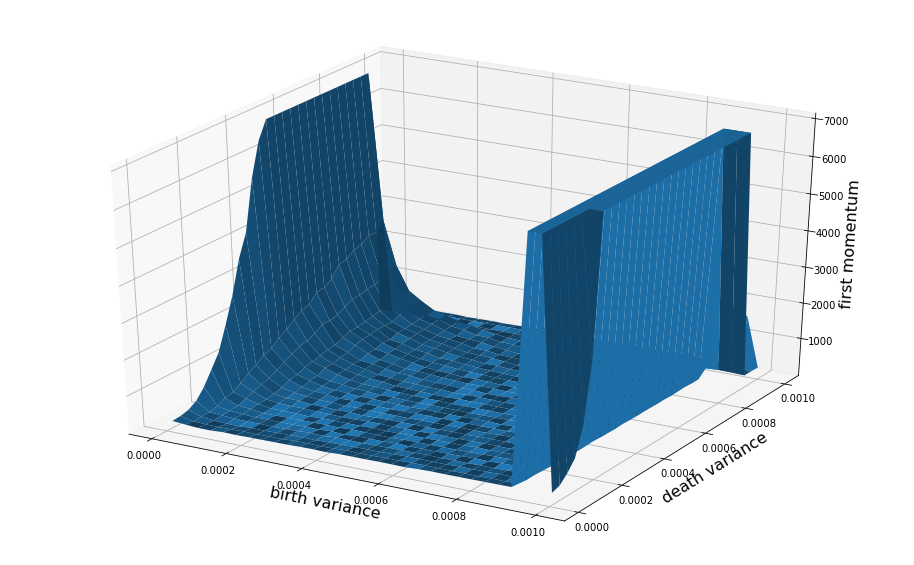

In [5]:
fig = plt.figure(figsize=[16, 10])
ax = fig.add_subplot(1, 1, 1, projection='3d')

birth_var_list_, death_var_list_ = np.meshgrid(np.unique(birth_var_list), np.unique(death_var_list))

# Plot the surface.
surf = ax.plot_surface(birth_var_list_, death_var_list_, first_momentum.reshape(birth_var_list_.shape))
ax.ticklabel_format(style='plain')

ax.set_xlabel('birth variance', fontsize=16)
ax.set_ylabel('death variance', fontsize=16)
ax.set_zlabel('first momentum', fontsize=16)

plt.show()

In [6]:
#запись параметрических точек с результатами для Миши

file = open("parameters.misha", "w")
file.truncate()

for num in first_momentum:
    file.write(str(num) + " ")
file.write("\n")

for num in birth_var_list:
    file.write(str(num) + " ")
file.write("\n")

for num in death_var_list:
    file.write(str(num) + " ")
file.write("\n")

file.close()


NR =  5000
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)
(192, 151)


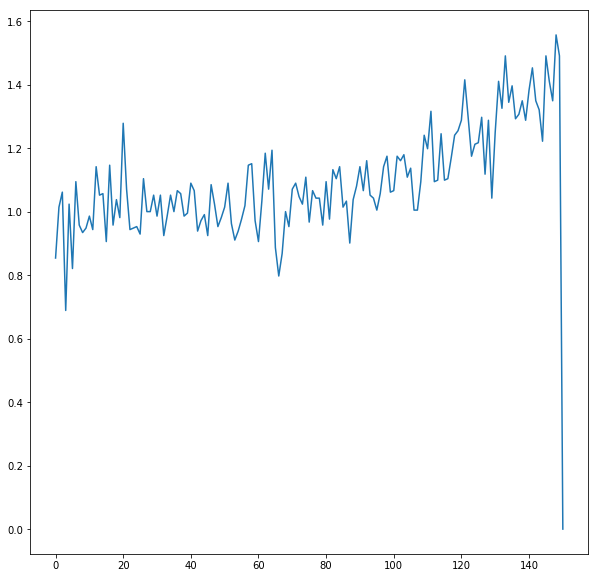

In [2]:
from pylab import *
get_ipython().magic(u'matplotlib inline')
a = loadtxt('./1.txt', dtype=int)

figure(figsize=(10,10))
#plot(movavg(mean(A,axis=0), 50))

tst = a[0][2:]
nr = tst.shape[0] # number of discrets
print('NR = ', nr)
L = 1.0 # cut size
#xx = linspace(0,L,)
dr = 1.0 * L / nr # discret size
deltaR = 10 * dr # RDF discret
superRDF = []

for time in range(1000,2000,100):
    tst = a[time,2:]
    rdf = []
    # цикл по чувакам
    for i in range(int(nr / 7), int(6 * nr / 7) ):
        if tst[i] == 0:
            continue
        # если есть хоть один чувак, строим от него RDF
        _rdf = zeros(int(nr * 0.03) + 1)
        # j - номер внутреннего края; j+10 - номер наружного края
        for j in range(0, int(nr * 0.3), 10):
            # если левый край выпал, мы его не считаем
            # если правый - тоже
            rithCut = 0
            leftCut = 0
            rat = 0
            if i + j + 10 < nr:
                rightCut = sum(tst[i + j: i + j + 10])
                if j == 0:
                    rightCut -= 1
                rat += deltaR
            if i - j -10 > 0:
                leftCut = sum(tst[i - j - 9: i - j + 1])
                if j == 0:
                    rightCut -= 1
                rat += deltaR
            # заполняем RDF-функию для i-го чувака(ов)
            _rdf[int(j / 10)] = 1.0 * (rightCut + leftCut) / rat
        # если чуваков более одного, то учитываем в статистике более раз
        _rdf *= tst[i]
        # присоединяем к статистике
        rdf.append(_rdf)
    rdf = array(rdf)
    print(rdf.shape)
    rdf = rdf.mean(axis=0) * (L /  sum(tst))
    
    superRDF.append(rdf)

superRDF = array(superRDF)
superRDF = superRDF.mean(axis=0)

xx = linspace(0, int(nr * 0.3), superRDF.shape[0])
plot(superRDF)